In [1]:
import pandas as pd
import numpy as np
from utils import load_data, preprocess_data
import matplotlib.pyplot as plt
import numpy as np

In [17]:



def count_images(df):
    # Calculate the number of images per person for each dataset
    images_per_person_l = df.groupby('id')['image_name'].count()

    # Define bins and labels
    bins = [26, 29, 30, 35]  # Ensure bins are strictly increasing
    labels = ['27-29', '30', '31-35']  # Labels for the bins

    # Bin the data and count occurrences
    l_counts = pd.cut(images_per_person_l, bins=bins, labels=labels).value_counts(sort=False)

    # Combine the results into a single table
    comparison_table = pd.DataFrame({
        'Range of Images (per person)': labels,
        'Number of Persons': l_counts.values,
    })
    print(comparison_table)
    return




In [2]:

    
df_s, df_l= load_data()

embedding_columns = ["embedding_"+str(i) for i in range(512)]
id_columns = ['id']
image_name_columns= ['image_name']
labels_columns = ['5_o_Clock_Shadow', 'Arched_Eyebrows',
       'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose',
       'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows',
       'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair',
       'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open',
       'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin',
       'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns',
       'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings',
       'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace',
       'Wearing_Necktie', 'Young']


count_images(df_s)

NameError: name 'count_images' is not defined

In [19]:
import pandas as pd
import plotly.express as px
from utils import *
def calculate_label_consistency(data, labels_columns):
    """
    Calculate the percentage of IDs where a label does not change across all pictures for each label.

    Parameters:
        data (pd.DataFrame): The dataset containing labels and IDs.
        labels_columns (list): List of label column names.

    Returns:
        pd.DataFrame: A DataFrame with labels as rows and percentages as values.
    """
    # Group data by ID and check if all label values are consistent
    consistency = data.groupby('id')[labels_columns].apply(lambda x: x.nunique() == 1)

    # Calculate the percentage of IDs where the label is consistent
    consistency_percentage = consistency.mean() * 100
    consistency_percentage=consistency_percentage.sort_values(ascending=False)
    return consistency_percentage





def create_plotbar(dataset, xlabel="x", ylabel="y", title="My Plotbar"):
    # Create the scatter plot with lines
    fig = px.scatter(
        x=dataset.index,
        y=dataset.values,
        labels={"x": xlabel, "y": ylabel},
        title=title,
    )

    # Add points (dots) with custom styling
    fig.update_traces(
        mode="markers",  # Set mode to 'markers' for dots
        marker=dict(
            size=10,  # Size of the dots
            color="skyblue",  # Fill color of the dots
            line=dict(color="black", width=1)  # Black border around the dots
        )
    )

    # Add horizontal gray lines for each tick value
    fig.update_layout(
        shapes=[
            dict(
                type="line",
                x0=-0.5,
                x1=len(dataset) - 0.5,
                y0=z,
                y1=z,
                line=dict(color="skyblue", width=1)
            ) for z in get_tickals(dataset)
        ],
        xaxis=dict(title=xlabel, tickangle=45),
        yaxis=dict(title=ylabel, tickvals=get_tickals(dataset)),
        margin=dict(l=40, r=40, t=40, b=120),
        height=600,
        plot_bgcolor="white",
    )

    return fig
    

# Example usage:
# Assuming `df` is your dataset with a column 'id' and label columns ['label1', 'label2', ...]
df = df_s  # Replace with your dataset
labels_columns = labels_columns  # Replace with your label column names

# Calculate label consistency percentages
consistency_df = calculate_label_consistency(df, labels_columns)

# Create and display the plot
fig = create_plotbar(consistency_df)
fig.show()


In [20]:
import pandas as pd
import numpy as np
import plotly.express as px

def calculate_correlation_matrix(data, selected_features):
    """
    Calculate the correlation matrix for the selected features.

    Parameters:
        data (pd.DataFrame): The dataset containing features.
        selected_features (list): List of selected features.

    Returns:
        pd.DataFrame: Correlation matrix of the selected features.
    """
    return data[selected_features].corr()

def plot_correlation_matrix(correlation_matrix, title="Correlation Matrix"):
    """
    Plot the correlation matrix as a heatmap.

    Parameters:
        correlation_matrix (pd.DataFrame): The correlation matrix.
        title (str): Title of the heatmap.

    Returns:
        plotly.graph_objects.Figure: The generated heatmap.
    """
    fig = px.imshow(
        correlation_matrix,
        text_auto=True,
        color_continuous_scale="Viridis",
        labels=dict(color="Correlation"),
        title=title,
    )

    fig.update_layout(
        xaxis=dict(title="Features", tickangle=45),
        yaxis=dict(title="Features"),
        margin=dict(l=40, r=40, t=40, b=120),
        height=600,
        plot_bgcolor="white",
    )

    return fig

# Example usage:
# Assuming `df` is your dataset with numerical features
selected_features = ['feature1', 'feature2', 'feature3']  # Replace with selected features
correlation_matrix = calculate_correlation_matrix(df, selected_features)
fig = plot_correlation_matrix(correlation_matrix)
fig.show()


KeyError: "None of [Index(['feature1', 'feature2', 'feature3'], dtype='object')] are in the [columns]"

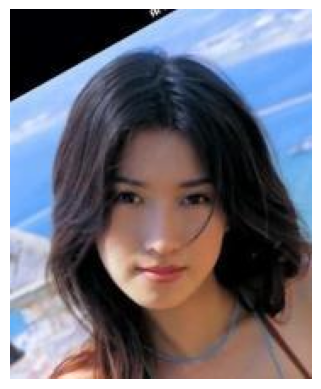

In [34]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Path to the image
image_path = 'celeba/img_celeba/000211.jpg'

# Read and display the image
img = mpimg.imread(image_path)

# Plot the image
plt.imshow(img)
plt.axis('off')  # Hide the axes for better visualization
plt.show()


/usr/lib64/python3.12/site-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


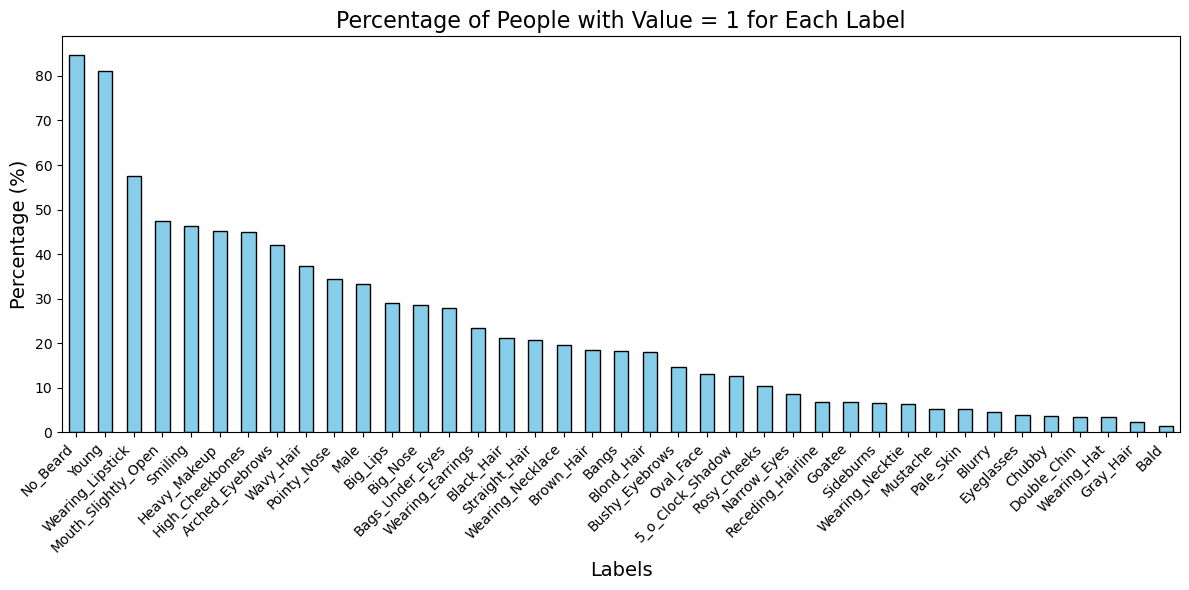

In [20]:

# Calculate the percentage of people with value = 1 for each label
percentages = (np.sum(df_s[labels_columns]==1)/ len(df_s)) * 100

# Plot the percentages
plt.figure(figsize=(12, 6))
percentages.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Percentage of People with Value = 1 for Each Label', fontsize=16)
plt.xlabel('Labels', fontsize=14)
plt.ylabel('Percentage (%)', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [21]:
# Retain only ID and label columns
df_s = df_s[['id'] + image_name_columns+labels_columns]
df_l = df_l[['id'] + image_name_columns+labels_columns]

# Merge datasets on 'id'
merged_df = pd.merge(df_s, df_l, on='id', suffixes=('_s', '_l'))

# Check for inconsistencies
inconsistent_ids = []
for label in labels_columns:
    mismatches = np.sum(df_s[f'{label}']  != df_l[f'{label}'])
    if mismatches:
        print(mismatches)
        print(label)
        break
        inconsistent_ids.append((label, mismatches['id'].tolist()))

# Print results
if inconsistent_ids:
    print("Inconsistencies found in the following labels:")
    for label, ids in inconsistent_ids:
        print(f" - {label}: {len(ids)} IDs with mismatches (IDs: {ids[:5]}{'...' if len(ids) > 5 else ''})")
else:
    print("All labels are consistent across the datasets for the same ID.")



All labels are consistent across the datasets for the same ID.


In [26]:


# Check for inconsistencies
inconsistent_ids_and_labels = {}

# Loop over each label to compare values
for label in labels_columns:
    # Compare values for the current label between both datasets
    for id_value in df_s['id'].unique():
        # Check if values are inconsistent for this id and label
        value_s = df_s[df_s['id'] == id_value][f'{label}']
        if len(np.unique(value_s))>1:

            try:
                inconsistent_ids_and_labels[label].append(id_value)
            except:
                inconsistent_ids_and_labels[label] = [id_value]





In [34]:
import pickle

# Save dictionary to a file
with open('datasets/inconsistent_ids_and_labels.pkl', 'wb') as file:
    pickle.dump(inconsistent_ids_and_labels, file)

[1261, 1264, 1270, 1318, 1326, 1335, 1341, 1382, 1410, 1455, 1496, 1569, 1591, 1607, 1631, 1639, 1649, 1725, 1744, 1805, 1807, 1809, 1912, 1946, 2168, 2316, 2337, 2451, 3994, 4017, 4028, 4138, 4139, 4151, 4165, 4204, 4242, 4256, 4263, 4290, 4321, 4326, 4462, 4493, 4514, 4539, 4573, 4593, 4602, 4637, 4652, 4715, 5084, 5125, 5133, 5170, 5178, 5224, 5225, 5238, 5243, 5346, 5370, 5447, 5459, 5488, 5530, 5543, 5566, 5569, 5635, 5696, 5748, 5805, 5815, 5921, 5928, 5951, 6043, 6046, 6080, 6112, 6137, 6142, 6147, 6163, 6177, 6181, 6183, 6225, 6236, 6241, 6262, 6286, 6288, 6296, 6305, 6311, 6316, 6318, 6330, 6335, 6339, 6367, 6387, 9152, 10082, 10090, 10111, 10173]


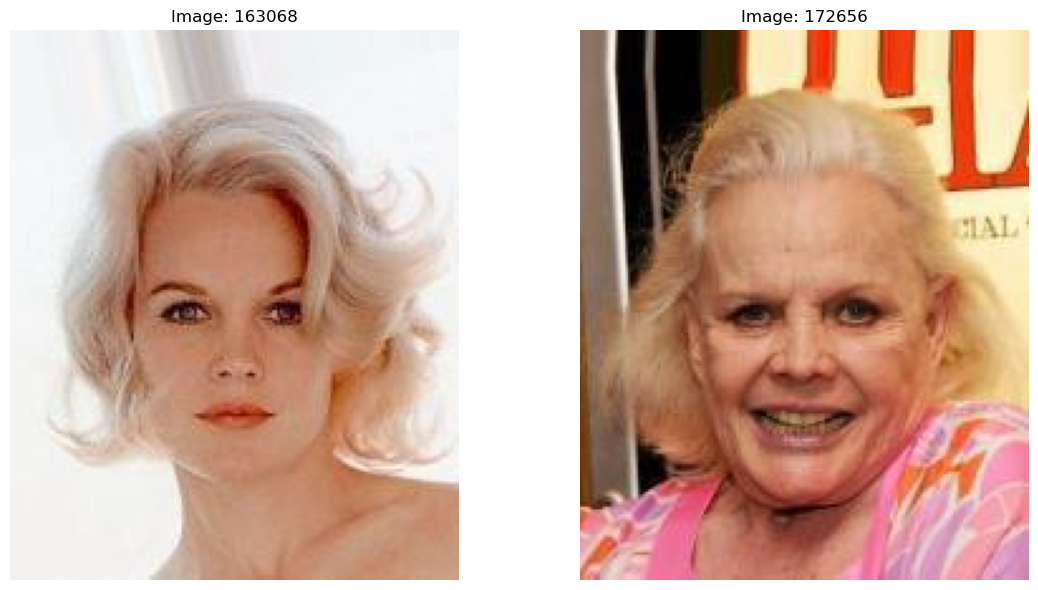

In [33]:
print(inconsistent_ids_and_labels['Male'])


import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Load the images
img1 = mpimg.imread("img_celeba/163068.jpg")
img2 = mpimg.imread("img_celeba/172656.jpg")

# Create a figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Display the first image
axes[0].imshow(img1)
axes[0].axis("off")  # Turn off axes for the image
axes[0].set_title("Image: 163068")

# Display the second image
axes[1].imshow(img2)
axes[1].axis("off")  # Turn off axes for the image
axes[1].set_title("Image: 172656")

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


In [32]:
df_s[df_s['id'] == 1631][['id','image_name','Male']]

,id,image_name,Male
4167,1631,163068.jpg,-1
4168,1631,163173.jpg,-1
4169,1631,163869.jpg,-1
4170,1631,165819.jpg,-1
4171,1631,166765.jpg,-1
4172,1631,167290.jpg,-1
4173,1631,168855.jpg,-1
4174,1631,169282.jpg,-1
4175,1631,169622.jpg,-1
4176,1631,169704.jpg,-1


In [25]:
# Print results
if inconsistent_ids_and_labels:
    print("Inconsistencies found:")
    print([k for k in inconsistent_ids_and_labels.keys()])

else:
    print("All labels are consistent across the datasets for the same ID.")



Inconsistencies found:
['5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 'Bald', 'Bangs', 'Big_Lips', 'Big_Nose', 'Black_Hair', 'Blond_Hair', 'Blurry', 'Brown_Hair', 'Bushy_Eyebrows', 'Chubby', 'Double_Chin', 'Eyeglasses', 'Goatee', 'Gray_Hair', 'Heavy_Makeup', 'High_Cheekbones', 'Male', 'Mouth_Slightly_Open', 'Mustache', 'Narrow_Eyes', 'No_Beard', 'Oval_Face', 'Pale_Skin', 'Pointy_Nose', 'Receding_Hairline', 'Rosy_Cheeks', 'Sideburns', 'Smiling', 'Straight_Hair', 'Wavy_Hair', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie', 'Young']


In [26]:
df_l.head()

,id,image_name,5_o_Clock_Shadow,Arched_Eyebrows,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,15,011256.jpg,1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,1,-1,-1,-1,1
1,15,013138.jpg,-1,-1,-1,-1,-1,1,-1,1,...,-1,-1,1,-1,-1,-1,-1,-1,-1,1
2,15,018122.jpg,1,1,-1,-1,-1,-1,-1,1,...,1,-1,1,-1,-1,-1,-1,-1,-1,1
3,15,026437.jpg,1,1,1,-1,-1,-1,-1,1,...,1,-1,1,-1,-1,-1,-1,-1,-1,1
4,15,029700.jpg,1,-1,-1,-1,-1,-1,-1,1,...,1,-1,1,-1,-1,-1,-1,-1,1,1


In [27]:

# Compare labels for each column
inconsistent_labels = {}
for label in labels_columns:
    # Check where the values differ for the same `id`
    mismatches = merged[merged[f'{label}_s'] != merged[f'{label}_l']]
    if not mismatches.empty:
        inconsistent_labels[label] = len(mismatches)

# Output results
if inconsistent_labels:
    print("Inconsistencies found in the following labels:")
    for label, count in inconsistent_labels.items():
        print(f"- {label}: {count} mismatches")
else:
    print("All labels are consistent across the datasets for matching IDs.")


NameError: name 'merged' is not defined

In [1]:
import pandas as pd

from utils import *

def get_pca_projection(buffalo_l_embed, n_components=2):
    pca = PCA(n_components, random_state=0)
    pca_results = pca.fit_transform(buffalo_l_embed)
    if n_components == 2:
        return pd.DataFrame(pca_results, columns=['PCA1', 'PCA2'])
    else:
        return pd.DataFrame(pca_results, columns=[f'PCA{i+1}' for i in range(n_components)])


def get_embed_projection(columns_label=labels_columns, column_not_label=labels_columns):
    dfl = pd.read_csv("datasets/l_embed.csv")
    dfl.drop("Unnamed: 0", axis=1, inplace=True)

    dfs = pd.read_csv("datasets/s_embed.csv")
    dfs.drop("Unnamed: 0", axis=1, inplace=True)

    columns_name = ["embed_"+i for i in columns_label]+["embed_not_"+i for i in column_not_label]
    return dfs[columns_name], dfl[columns_name]


get_embed_projection()
# les colonnes sont sous la forme: embed_+human_embed	embed_not_+human_embed

(       embed_5_o_Clock_Shadow  embed_Arched_Eyebrows  embed_Bags_Under_Eyes  \
 0                    5.183056               1.610430               3.632739   
 1                    4.256535               0.398694               2.017535   
 2                    5.436513               1.742367               3.360829   
 3                    5.130972               0.364478               2.551776   
 4                    5.780362               2.736071               3.659405   
 ...                       ...                    ...                    ...   
 30007               -0.347403               2.615857               0.377057   
 30008               -1.415128              -0.644844              -2.101709   
 30009               -0.050120               0.018434              -0.533728   
 30010                0.749125               2.722487               0.241696   
 30011               -0.408322               0.738659              -0.542473   
 
        embed_Bald  embed_Bangs  embed